<a href="https://colab.research.google.com/github/kwanyudyson/QM2/blob/main/presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
deprivation = pd.read_excel('id_by_la.xlsx', sheet_name = 5)
deprivation
deprivation.columns = deprivation.iloc[0]
deprivation.rename(columns={deprivation.columns[6]: 'Rural/Urban'}, inplace=True)
deprivation.rename(columns={deprivation.columns[5]: 'Rural Index'}, inplace=True)
deprivation.drop(deprivation.index[0], inplace = True)

columns_to_drop = ['Rural Index', 'Deprivation gap (percentage points)', 'Deprivation gap ranking', "Moran's I", "Moran's I ranking", 'Income deprivation rate ranking']

deprivation = deprivation.drop(columns = columns_to_drop)
deprivation.head()

,NaN,Local Authority District code (2019),Local Authority District name (2019),Profile,Rural-urban classification,Rural/Urban,Income deprivation rate,Income deprivation rate quintile
1,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3
2,NaN,E07000026,Allerdale,Flat,Mainly Rural (rural including hub towns >=80%),Rural,0.121,3
3,NaN,E07000032,Amber Valley,n-shape,Urban with Minor Conurbation,Urban,0.109,3
4,NaN,E07000224,Arun,n-shape,Urban with City and Town,Urban,0.104,3
5,NaN,E07000170,Ashfield,More income deprived,Urban with City and Town,Urban,0.152,2


In [ ]:
deprivation.columns

Index([                                   nan,
       'Local Authority District code (2019)',
       'Local Authority District name (2019)',
                                    'Profile',
                 'Rural-urban classification',
                                'Rural/Urban',
                    'Income deprivation rate',
           'Income deprivation rate quintile'],
      dtype='object', name=0)

In [ ]:
marriages_by_age = pd.read_excel('marriage_age_ELAD.xlsx', sheet_name=3)
marriages_by_age.columns = marriages_by_age.iloc[4]
marriages_by_age.drop(marriages_by_age.index[0:5], inplace=True)

# Change occurances of 'c' to 0
marriages_by_age.iloc[:, 2:] = marriages_by_age.iloc[:, 2:].replace('c', 0)
marriages_by_age

4,Area name,Area code,Age of usual resident,Never married and never registered a civil partnership (value),Married or in a civil partnership (value),"Seperated, but still legally married or still legally in a civil partnership (value)",Divorced or formerly in a civil partnership (value),Widowed or surviving partner from a civil partnership (value)
5,Hartlepool,E06000001,Aged 16 to 19 years,4005,0,0,0,0
6,Hartlepool,E06000001,Aged 20 to 24 years,5045,60,0,0,0
7,Hartlepool,E06000001,Aged 25 to 29 years,4915,500,45,30,0
8,Hartlepool,E06000001,Aged 30 to 34 years,3865,1705,165,140,0
9,Hartlepool,E06000001,Aged 35 to 39 years,2650,2280,235,285,10
...,...,...,...,...,...,...,...,...
4965,Merthyr Tydfil,W06000024,Aged 65 to 69 years,245,2040,45,510,310
4966,Merthyr Tydfil,W06000024,Aged 70 to 74 years,170,1985,35,410,555
4967,Merthyr Tydfil,W06000024,Aged 75 to 79 years,100,1220,15,220,610
4968,Merthyr Tydfil,W06000024,Aged 80 to 84 years,60,630,10,100,635


In [ ]:
# Merge the two DataFrames

combined = pd.merge(deprivation, marriages_by_age, right_on='Area code', left_on='Local Authority District code (2019)')

combined_to_drop = ['Area name', 'Area code']
combined.drop(columns = combined_to_drop)
combined.head()

,NaN,Local Authority District code (2019),Local Authority District name (2019),Profile,Rural-urban classification,Rural/Urban,Income deprivation rate,Income deprivation rate quintile,Area name,Area code,Age of usual resident,Never married and never registered a civil partnership (value),Married or in a civil partnership (value),"Seperated, but still legally married or still legally in a civil partnership (value)",Divorced or formerly in a civil partnership (value),Widowed or surviving partner from a civil partnership (value)
0,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 16 to 19 years,2515,0,0,0,0
1,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 20 to 24 years,2620,45,0,0,0
2,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 25 to 29 years,2750,355,20,25,0
3,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 30 to 34 years,2210,1295,65,95,0
4,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 35 to 39 years,1575,2040,120,200,0


In [ ]:
cols_to_convert = combined.columns[11:16]
combined[cols_to_convert] = combined[cols_to_convert].apply(pd.to_numeric, errors='coerce')
combined['Population'] = combined[cols_to_convert].sum(axis=1)
combined.head()

,NaN,Local Authority District code (2019),Local Authority District name (2019),Profile,Rural-urban classification,Rural/Urban,Income deprivation rate,Income deprivation rate quintile,Area name,Area code,Age of usual resident,Never married and never registered a civil partnership (value),Married or in a civil partnership (value),"Seperated, but still legally married or still legally in a civil partnership (value)",Divorced or formerly in a civil partnership (value),Widowed or surviving partner from a civil partnership (value),Population
0,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 16 to 19 years,2515,0,0,0,0,2515
1,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 20 to 24 years,2620,45,0,0,0,2665
2,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 25 to 29 years,2750,355,20,25,0,3150
3,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 30 to 34 years,2210,1295,65,95,0,3665
4,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 35 to 39 years,1575,2040,120,200,0,3935


In [ ]:
combined['Population']

0        2515
1        2665
2        3150
3        3665
4        3935
        ...  
4570     9780
4571    10480
4572     7460
4573     5520
4574     5480
Name: Population, Length: 4575, dtype: int64

In [ ]:
combined['Proportionate Marriage Rate'] = combined['Married or in a civil partnership (value)']/combined['Population']

combined.head(16)

,NaN,Local Authority District code (2019),Local Authority District name (2019),Profile,Rural-urban classification,Rural/Urban,Income deprivation rate,Income deprivation rate quintile,Area name,Area code,Age of usual resident,Never married and never registered a civil partnership (value),Married or in a civil partnership (value),"Seperated, but still legally married or still legally in a civil partnership (value)",Divorced or formerly in a civil partnership (value),Widowed or surviving partner from a civil partnership (value),Population,Proportionate Marriage Rate
0,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 16 to 19 years,2515,0,0,0,0,2515,0.000000
1,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 20 to 24 years,2620,45,0,0,0,2665,0.016886
2,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 25 to 29 years,2750,355,20,25,0,3150,0.112698
3,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 30 to 34 years,2210,1295,65,95,0,3665,0.353342
4,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 35 to 39 years,1575,2040,120,200,0,3935,0.518424
5,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 40 to 44 years,1365,2270,135,340,20,4130,0.549637
6,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 45 to 49 years,1285,2415,210,545,45,4500,0.536667
7,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 50 to 54 years,1140,2530,185,730,70,4655,0.543502
8,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 55 to 59 years,845,2495,155,910,120,4525,0.551381
9,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 60 to 64 years,500,2390,105,765,205,3965,0.602774


In [ ]:
population_by_ladc = combined.groupby('Local Authority District name (2019)').agg(Total_Population=('Population', 'sum')).reset_index()

combined['Total_Married'] = combined['Married or in a civil partnership (value)']
total_married_by_town = combined.groupby('Local Authority District name (2019)').agg(Total_Married=('Total_Married', 'sum')).reset_index()
total_married_by_town['Marriage Rate'] = total_married_by_town['Total_Married'] / population_by_ladc['Total_Population']

deprivation_rate_df = combined.groupby('Local Authority District name (2019)')['Income deprivation rate'].first().reset_index()

overall_df = pd.merge(population_by_ladc, total_married_by_town, on='Local Authority District name (2019)')
overall_df = pd.merge(overall_df, deprivation_rate_df, on='Local Authority District name (2019)', how='left')

overall_df

,Local Authority District name (2019),Total_Population,Total_Married,Marriage Rate,Income deprivation rate
0,Adur,52945,24135,0.455850,0.108
1,Allerdale,80510,38965,0.483977,0.121
2,Amber Valley,105060,50075,0.476632,0.109
3,Arun,139535,66220,0.474576,0.104
4,Ashfield,102805,45625,0.443801,0.152
...,...,...,...,...,...
300,Worthing,92330,40650,0.440269,0.101
301,Wychavon,110700,57465,0.519106,0.085
302,Wyre,94325,45585,0.483276,0.125
303,Wyre Forest,84535,39265,0.464482,0.127


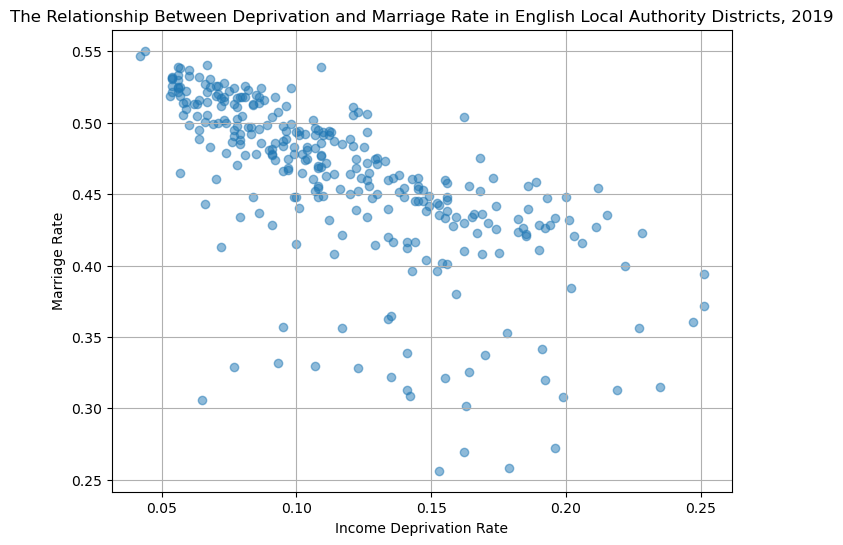

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(overall_df['Income deprivation rate'], overall_df['Marriage Rate'], alpha=0.5)
plt.title('The Relationship Between Deprivation and Marriage Rate in English Local Authority Districts, 2019')
plt.xlabel('Income Deprivation Rate')
plt.ylabel('Marriage Rate')
plt.grid(True)
plt.show()

In [ ]:
# Another analysis looking into the relationship between deprivation and divorce/separated
combined['divorced_or_separated'] = combined['Seperated, but still legally married or still legally in a civil partnership (value)'] + combined['Divorced or formerly in a civil partnership (value)']
combined.head()

,NaN,Local Authority District code (2019),Local Authority District name (2019),Profile,Rural-urban classification,Rural/Urban,Income deprivation rate,Income deprivation rate quintile,Area name,Area code,Age of usual resident,Never married and never registered a civil partnership (value),Married or in a civil partnership (value),"Seperated, but still legally married or still legally in a civil partnership (value)",Divorced or formerly in a civil partnership (value),Widowed or surviving partner from a civil partnership (value),Population,Proportionate Marriage Rate,Total_Married,divorced_or_separated
0,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 16 to 19 years,2515,0,0,0,0,2515,0.000000,0,0
1,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 20 to 24 years,2620,45,0,0,0,2665,0.016886,45,0
2,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 25 to 29 years,2750,355,20,25,0,3150,0.112698,355,45
3,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 30 to 34 years,2210,1295,65,95,0,3665,0.353342,1295,160
4,NaN,E07000223,Adur,n-shape,Urban with City and Town,Urban,0.108,3,Adur,E07000223,Aged 35 to 39 years,1575,2040,120,200,0,3935,0.518424,2040,320


In [ ]:
combined['Total_Divorced_or_Separated'] = combined['divorced_or_separated']
total_married_by_town = combined.groupby('Local Authority District name (2019)').agg(Total_Divorced_or_Separated=('Total_Divorced_or_Separated', 'sum')).reset_index()
total_married_by_town['Divorced/Separated Rate'] = total_married_by_town['Total_Divorced_or_Separated'] / population_by_ladc['Total_Population']

deprivation_rate_df = combined.groupby('Local Authority District name (2019)')['Income deprivation rate'].first().reset_index()

other_overall_df = pd.merge(population_by_ladc, total_married_by_town, on='Local Authority District name (2019)')
other_overall_df = pd.merge(other_overall_df, deprivation_rate_df, on='Local Authority District name (2019)', how='left')

other_overall_df

,Local Authority District name (2019),Total_Population,Total_Divorced_or_Separated,Divorced/Separated Rate,Income deprivation rate
0,Adur,52945,7035,0.132874,0.108
1,Allerdale,80510,9305,0.115576,0.121
2,Amber Valley,105060,13375,0.127308,0.109
3,Arun,139535,18835,0.134984,0.104
4,Ashfield,102805,13100,0.127426,0.152
...,...,...,...,...,...
300,Worthing,92330,12855,0.139229,0.101
301,Wychavon,110700,13125,0.118564,0.085
302,Wyre,94325,12195,0.129287,0.125
303,Wyre Forest,84535,11305,0.133732,0.127


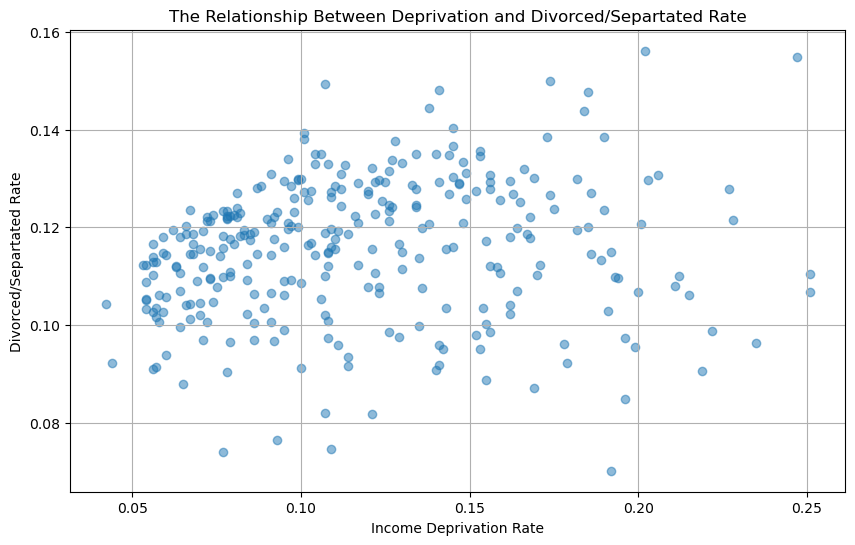

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(overall_df['Income deprivation rate'], other_overall_df['Divorced/Separated Rate'], alpha=0.5)
plt.title('The Relationship Between Deprivation and Divorced/Separtated Rate')
plt.xlabel('Income Deprivation Rate')
plt.ylabel('Divorced/Separtated Rate')
plt.grid(True)
plt.show()

In [ ]:
geolocator = Nominatim(user_agent="Your_Name")

longitudes = []
latitudes = []

for authority in overall_df['Local Authority District name (2019)']:
    location = geolocator.geocode(authority)
    if location:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        latitudes.append(None)
        longitudes.append(None)

overall_df['longitude'] = longitudes
overall_df['latitude'] = latitudes

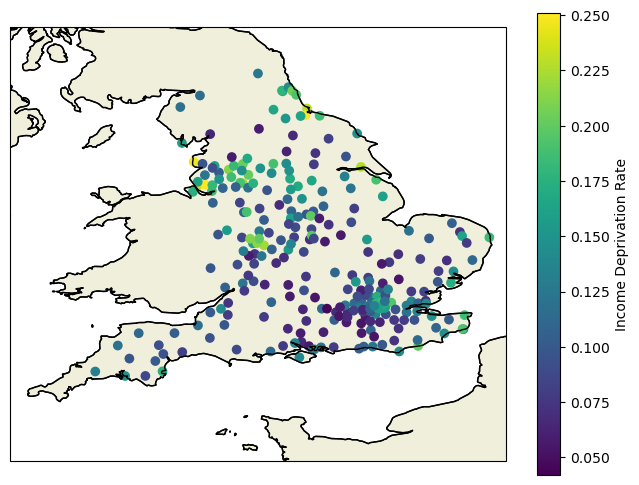

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})

sc = ax.scatter(overall_df['longitude'], overall_df['latitude'],
                c=overall_df['Income deprivation rate'],
                cmap='viridis',
                marker='o',
                transform=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.set_extent([-6, 2, 49, 56])

cbar = fig.colorbar(sc, ax=ax, orientation='vertical')
cbar.set_label('Income Deprivation Rate')

plt.show()

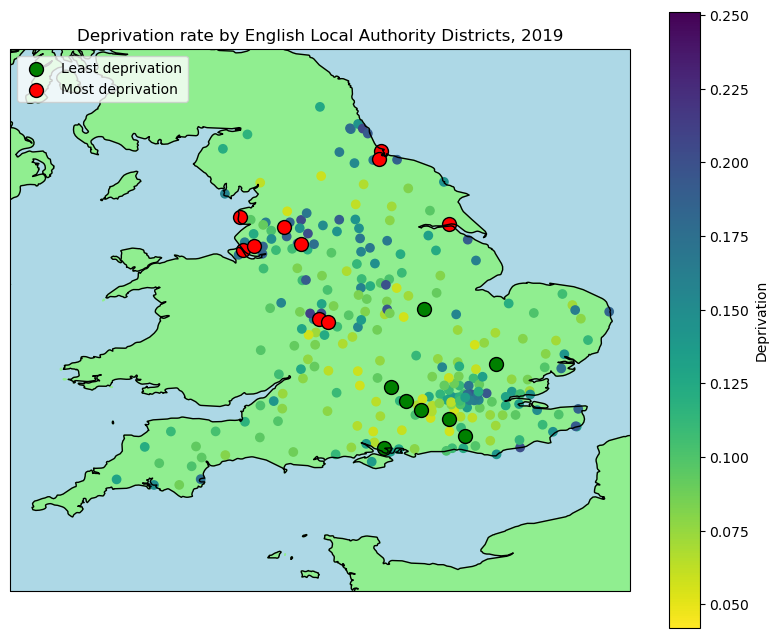

In [ ]:
sorted_df = overall_df.sort_values(by='Income deprivation rate', ascending=True)

bottom_10 = sorted_df.head(10)
top_10 = sorted_df.tail(10)

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree()})

sc = ax.scatter(overall_df['longitude'], overall_df['latitude'],
                c=overall_df['Income deprivation rate'],
                cmap='viridis_r',
                marker='o',
                transform=ccrs.PlateCarree())

ax.scatter(bottom_10['longitude'], bottom_10['latitude'],
           color='green', s=100, edgecolors='black',
           marker='o', transform=ccrs.PlateCarree(), label='Least deprivation')

ax.scatter(top_10['longitude'], top_10['latitude'],
           color='red', s=100, edgecolors='black',
           marker='o', transform=ccrs.PlateCarree(), label='Most deprivation')

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.OCEAN, zorder=0, color='lightblue')
ax.add_feature(cfeature.LAND, zorder=0, color='lightgreen')

ax.set_extent([-6, 2, 49, 56])

cbar = fig.colorbar(sc, ax=ax, orientation='vertical')
cbar.set_label('Deprivation')

ax.legend(loc='upper left')
ax.set_title('Deprivation rate by English Local Authority Districts, 2019')

plt.show()

In [ ]:
bottom_10

,Local Authority District name (2019),Total_Population,Total_Married,Marriage Rate,Income deprivation rate,longitude,latitude
139,Lambeth,268945,68935,0.256316,0.153,-0.116335,51.495211
132,Islington,183620,47385,0.258060,0.179,-0.099905,51.538429
238,Southwark,256125,68985,0.269341,0.162,-0.069019,51.465255
107,Hackney,209455,56960,0.271944,0.196,-0.049362,51.543240
181,Norwich,120750,36430,0.301698,0.163,1.292395,52.628558
57,City of London,7965,2435,0.305712,0.065,-0.091998,51.515618
182,Nottingham,264300,81430,0.308097,0.199,-1.149646,52.953419
110,Hammersmith and Fulham,154605,47750,0.308852,0.142,-0.227878,51.498314
152,Manchester,437935,137075,0.313003,0.219,-2.245115,53.479489
42,Camden,177910,55700,0.313080,0.141,-75.119891,39.944840
